# RQ4: Replace Tokenizer

- Model was trained and evaluated
- Compare with RQ1
- Find out how long training took

In [2]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
from matplotlib import rcParams
rcParams.update({'font.size': 14})
rcParams["figure.figsize"] = (20,8)

rcParams.update({'font.size': 14})

value_scores = {
    "attr_ids": {
        "t_score": [0.96],
        "v_score": [0.54]
    },
    "num_ids": {
        "t_score": [0.72],
        "v_score": [0.59]
    },
    "name_ids": {
        "t_score": [0.9],
        "v_score": [0.64]
    },
    "param_ids": {
        "t_score": [0.89],
        "v_score": [0.6]
    },
    "string_ids": {
        "t_score": [0.81],
        "v_score": [0.32]
    }
}
type_scores = {
    "call_ids": [0.78],
    "assign_ids": [0.69],
    "return_ids": [0.37],
    "list_ids": [0.37],
    "dict_ids": [0.003],
    "raise_ids": [0.36]
}

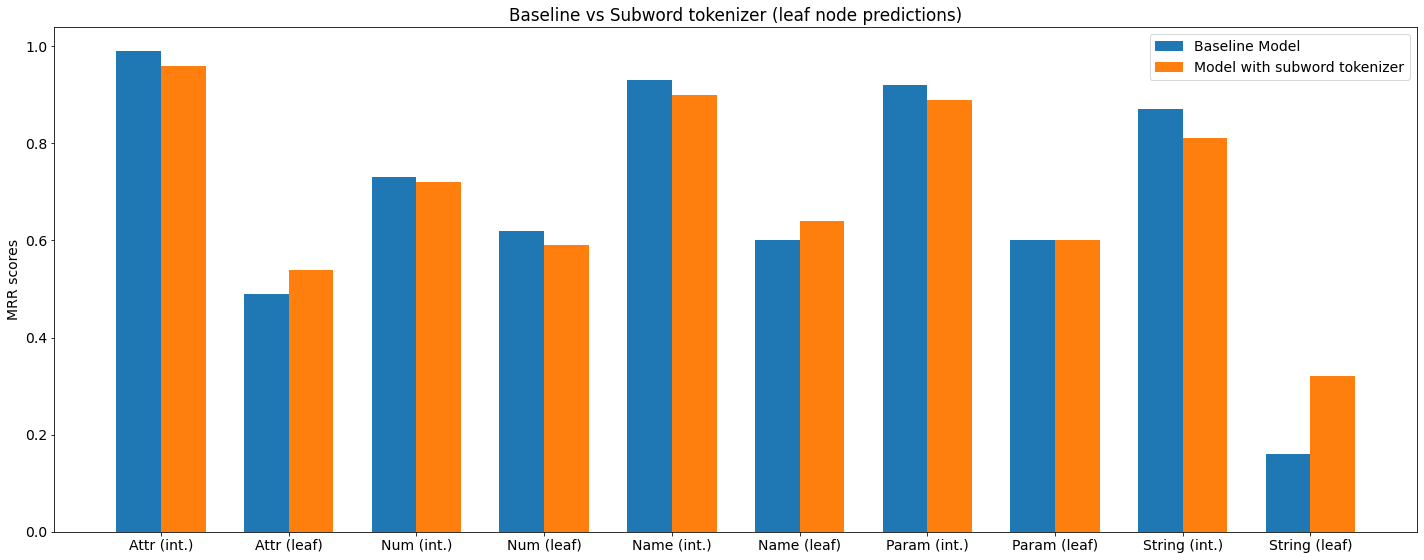

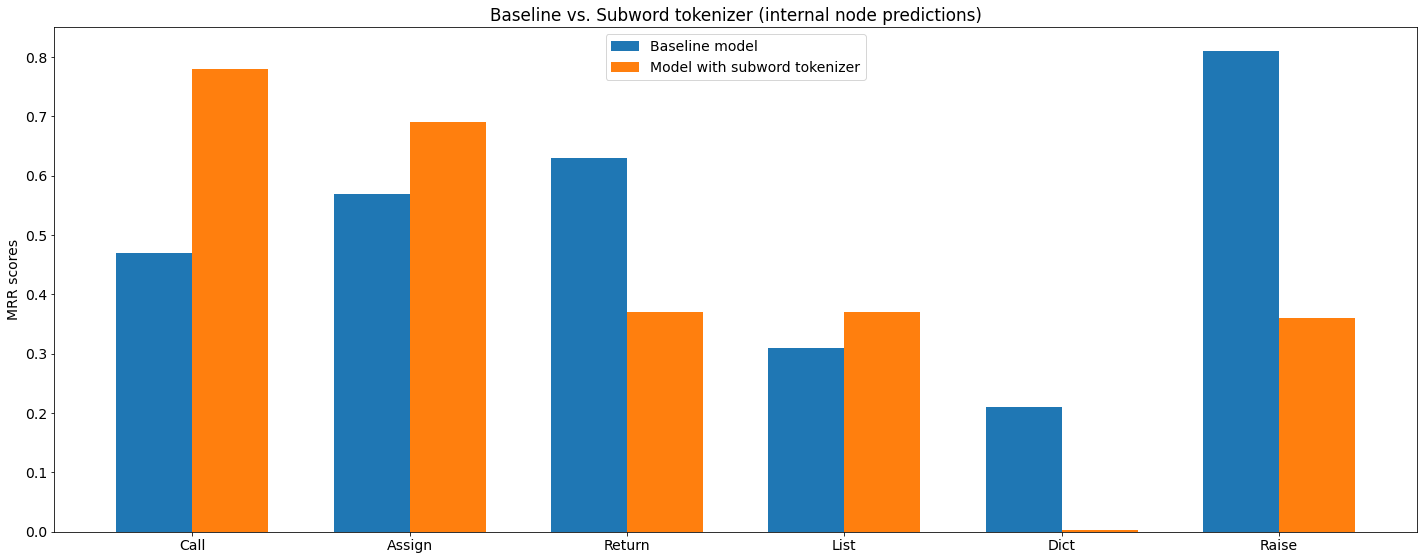

In [3]:
rq4_value_scores = []
rq4_type_scores = []

for key, value in value_scores.items():
    rq4_value_scores.append(value["t_score"][0])
    rq4_value_scores.append(value["v_score"][0])
for key, value in type_scores.items():
    rq4_type_scores.append(value[0])

rq1_scores_file = pickle.load(open("rq1/scores.pkl", "rb"))
rq1_value_scores = []
rq1_type_scores = []
rq1_value_scores.append(rq1_scores_file["value_scores"]["attr_ids"]["t_score"][-1])
rq1_value_scores.append(rq1_scores_file["value_scores"]["attr_ids"]["v_score"][-1])
rq1_value_scores.append(rq1_scores_file["value_scores"]["num_ids"]["t_score"][-1])
rq1_value_scores.append(rq1_scores_file["value_scores"]["num_ids"]["v_score"][-1])
rq1_value_scores.append(rq1_scores_file["value_scores"]["name_ids"]["t_score"][-1])
rq1_value_scores.append(rq1_scores_file["value_scores"]["name_ids"]["v_score"][-1])
rq1_value_scores.append(rq1_scores_file["value_scores"]["param_ids"]["t_score"][-1])
rq1_value_scores.append(rq1_scores_file["value_scores"]["param_ids"]["v_score"][-1])
rq1_value_scores.append(rq1_scores_file["value_scores"]["string_ids"]["t_score"][-1])
rq1_value_scores.append(rq1_scores_file["value_scores"]["string_ids"]["v_score"][-1])
rq1_type_scores.append(rq1_scores_file["type_scores"]["call_ids"]["score"][-1])
rq1_type_scores.append(rq1_scores_file["type_scores"]["assign_ids"]["score"][-1])
rq1_type_scores.append(rq1_scores_file["type_scores"]["return_ids"]["score"][-1])
rq1_type_scores.append(rq1_scores_file["type_scores"]["list_ids"]["score"][-1])
rq1_type_scores.append(rq1_scores_file["type_scores"]["dict_ids"]["score"][-1])
rq1_type_scores.append(rq1_scores_file["type_scores"]["raise_ids"]["score"][-1])

width = 0.35
value_labels = [
    "Attr (int.)", 
    "Attr (leaf)", 
    "Num (int.)", 
    "Num (leaf)", 
    "Name (int.)", 
    "Name (leaf)", 
    "Param (int.)", 
    "Param (leaf)", 
    "String (int.)", 
    "String (leaf)"
]
type_labels = [
    "Call", 
    "Assign", 
    "Return", 
    "List", 
    "Dict", 
    "Raise"
]

x = np.arange(len(value_labels))
width = 0.35
fig, ax = plt.subplots()
r1 = ax.bar(x - width/2, rq1_value_scores, width, label="Baseline Model")
r2 = ax.bar(x + width/2, rq4_value_scores, width, label="Model with subword tokenizer")

ax.set_ylabel("MRR scores")
ax.set_title("Baseline vs Subword tokenizer (leaf node predictions)")
ax.set_xticks(x)
ax.set_xticklabels(value_labels)
ax.legend()

fig.tight_layout()

plt.show()

x = np.arange(len(type_labels))
width = 0.35
fig, ax = plt.subplots()
r1 = ax.bar(x - width/2, rq1_type_scores, width, label="Baseline model")
r2 = ax.bar(x + width/2, rq4_type_scores, width, label="Model with subword tokenizer")

ax.set_ylabel("MRR scores")
ax.set_title("Baseline vs. Subword tokenizer (internal node predictions)")
ax.set_xticks(x)
ax.set_xticklabels(type_labels)
ax.legend()

fig.tight_layout()

plt.show()